<a href="https://colab.research.google.com/github/MekhzZ/Learning_path_Data_Analyst/blob/main/Data_Understanding_%26_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing dataset using Kaggle api**

In [ ]:
!pip install kaggle

uploading kaggle.json an api from kaggle profile

In [66]:
!mkdir -p ~/.kaggle #creating kaggle directory
!cp kaggle.json ~/.kaggle/ #copies kaggle json to the directory
!chmod 600 ~/.kaggle/kaggle.json #ensures secure 600 persmission for owner only

In [67]:
!kaggle competitions download -c kaggle-survey-2020

kaggle-survey-2020.zip: Skipping, found more recently modified local copy (use --force to force download)


In [68]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/kaggle-survey-2020.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**kaggle api made easy to download required dataset fast and easy. If we gonna upload dataset manually then it gonna take a few minutes while kagglr api takes just a few seconds**

# **Data Understanding**

In [ ]:
!pip install pandas-profiling

In [70]:
#loading required modules

import numpy as np
import pandas as pd
import ydata_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('/content/kaggle_survey_2020_responses.csv')

<ipython-input-71-23f602a4074d>:1: DtypeWarning: Columns (0,18,31,45,50,63,80,92,99,105,130,171,187,241,254,266,278,289,307,322,330,342,353) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/kaggle_survey_2020_responses.csv')


In [72]:
df.shape

(20037, 355)

In [73]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#listing columns names

for col in df.columns:

  print(col)

In [ ]:
#listing questions

for q in df.loc[0]:
  print(q)

In [76]:
# preparing a dataframe containing question numbers and questions

q_df = pd.DataFrame({'q_header': list(df.columns), 'question': df.loc[0]})

In [77]:
q_df.head()

,q_header,question
Time from Start to Finish (seconds),Time from Start to Finish (seconds),Duration (in seconds)
Q1,Q1,What is your age (# years)?
Q2,Q2,What is your gender? - Selected Choice
Q3,Q3,In which country do you currently reside?
Q4,Q4,What is the highest level of formal education ...


In [78]:
# extracting ques numbers from q_header

q_df['q_num'] = q_df['q_header'].str.extract('(\d+)')

In [79]:
q_df.head()

,q_header,question,q_num
Time from Start to Finish (seconds),Time from Start to Finish (seconds),Duration (in seconds),NaN
Q1,Q1,What is your age (# years)?,1
Q2,Q2,What is your gender? - Selected Choice,2
Q3,Q3,In which country do you currently reside?,3
Q4,Q4,What is the highest level of formal education ...,4


In [80]:
q_df.reset_index(drop=True, inplace=True)

In [81]:
q_df.head()

,q_header,question,q_num
0,Time from Start to Finish (seconds),Duration (in seconds),NaN
1,Q1,What is your age (# years)?,1
2,Q2,What is your gender? - Selected Choice,2
3,Q3,In which country do you currently reside?,3
4,Q4,What is the highest level of formal education ...,4


In [82]:
#extracing question keys from q_header

def ques_keys(x):
    if x.find('_A_') != -1:
        str_out = x.split('_')[0] + '_A'
    elif x.find('_B_') != -1:
        str_out = x.split('_')[0] + '_B'
    else:
        str_out = x.split('_')[0]
    return str_out

q_df['ques_keys'] = q_df.q_header.apply(lambda x: ques_keys(x))

# hamile question part haru lai cut out garera eutai question ho vanera dekhako

In [83]:
q_df

,q_header,question,q_num,ques_keys
0,Time from Start to Finish (seconds),Duration (in seconds),NaN,Time from Start to Finish (seconds)
1,Q1,What is your age (# years)?,1,Q1
2,Q2,What is your gender? - Selected Choice,2,Q2
3,Q3,In which country do you currently reside?,3,Q3
4,Q4,What is the highest level of formal education ...,4,Q4
...,...,...,...,...
350,Q35_B_Part_7,"In the next 2 years, do you hope to become mor...",35,Q35_B
351,Q35_B_Part_8,"In the next 2 years, do you hope to become mor...",35,Q35_B
352,Q35_B_Part_9,"In the next 2 years, do you hope to become mor...",35,Q35_B
353,Q35_B_Part_10,"In the next 2 years, do you hope to become mor...",35,Q35_B


In [84]:
# preparing a dataframe containg questions with numbers

q_count = q_df.groupby('ques_keys').size().reset_index()

In [85]:
q_count.columns = ['ques_keys','ques_count']

In [ ]:
q_count

In [87]:
q_count['ques_type'] = np.where(q_count.ques_count > 1, 'multiple_answer', 'single answer')

In [88]:
q_df = pd.merge(q_df, q_count[['ques_keys','ques_type']], how = 'left', left_on = 'ques_keys', right_on = 'ques_keys')


In [89]:
# Re-arranging columns
q_df = q_df[['q_header','ques_keys','q_num','ques_type','question']]

In [90]:
q_df.drop(0, axis=0, inplace=True)

In [91]:
print(q_df.shape)

q_df.head()

(354, 5)


,q_header,ques_keys,q_num,ques_type,question
1,Q1,Q1,1,single answer,What is your age (# years)?
2,Q2,Q2,2,single answer,What is your gender? - Selected Choice
3,Q3,Q3,3,single answer,In which country do you currently reside?
4,Q4,Q4,4,single answer,What is the highest level of formal education ...
5,Q5,Q5,5,single answer,Select the title most similar to your current ...


# Computing missing value percentages for every questions

In [92]:
## Computing missing value percentages for every question

def missing_value_perc(q_num):
    if q_df.ques_type[q_df.q_num == q_num].reset_index(drop = True)[0] == 'single_answer':
        mv_perc = df[q_num].isnull().sum()/df.shape[0]*100
    else:
       column_list = list(q_df.q_header[q_df.q_num == q_num])
       mv_perc = pd.isnull(df[column_list].bfill(axis=1).iloc[:, 0]).sum()/df.shape[0]*100
    return round(mv_perc, 2)


q_num = q_df.q_num.unique()
missing_perc = pd.Series(q_num).apply(lambda x: missing_value_perc(x))


ques_missing_perc = pd.DataFrame({'q_num': q_num,
                                'missing_perc': missing_perc})




In [130]:
ques_missing_perc.sort_values(by = 'missing_perc', ascending = False).head()

,q_num,missing_perc
31,32,92.52
18,19,85.92
29,30,82.46
17,18,76.24
33,34,67.09


In [99]:
q_df.head()

,q_header,ques_keys,q_num,ques_type,question
1,Q1,Q1,1,single answer,What is your age (# years)?
2,Q2,Q2,2,single answer,What is your gender? - Selected Choice
3,Q3,Q3,3,single answer,In which country do you currently reside?
4,Q4,Q4,4,single answer,What is the highest level of formal education ...
5,Q5,Q5,5,single answer,Select the title most similar to your current ...


In [101]:
q_df.question[q_df.q_num == '19'].unique()

array(['Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Word embeddings/vectors (GLoVe, fastText, word2vec)',
       'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Encoder-decorder models (seq2seq, vanilla transformers)',
       'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Contextualized embeddings (ELMo, CoVe)',
       'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Transformer language models (GPT-3, BERT, XLnet, etc)',
       'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - None',
       'Which of the following natural 

# Generating Insights

In [104]:
dat = df.loc[1:,]

In [105]:
dat.shape

(20036, 355)

In [115]:
dat.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
Q1_perc = dat['Q1'].value_counts()/dat.shape[0]*100

In [126]:
Q1_perc = Q1_perc.reset_index()

In [127]:
Q1_perc

,Q1,count
0,25-29,20.018966
1,22-24,18.895987
2,18-21,17.313835
3,30-34,14.029746
4,35-39,9.937113
5,40-44,6.972450
6,45-49,4.931124
7,50-54,3.483729
8,55-59,2.051308
9,60-69,1.986424


In [128]:
Q1_perc.columns = ['Age','Percentage']

<Axes: xlabel='Age', ylabel='Percentage'>

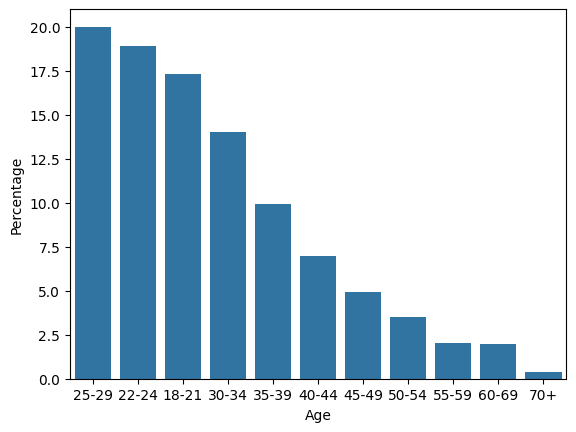

In [129]:
sns.barplot(x = 'Age', y = 'Percentage', data = Q1_perc)